### Importing libraries and loading data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv


### Loading Test and Train data with some Analysis

In [2]:
test = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_test.csv')
train = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')

In [3]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [5]:
print(train.shape)
print(test.shape)

(19158, 14)
(2129, 13)


In [6]:
print(train.isnull().sum())

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


In [7]:
print(test.isnull().sum())

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64


In [8]:
print(train.nunique())

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64


In [9]:
print(test.nunique())

enrollee_id               2129
city                       108
city_development_index      81
gender                       3
relevent_experience          2
enrolled_university          3
education_level              5
major_discipline             6
experience                  22
company_size                 8
company_type                 6
last_new_job                 6
training_hours             223
dtype: int64


## Some Visualization to get more Insights 

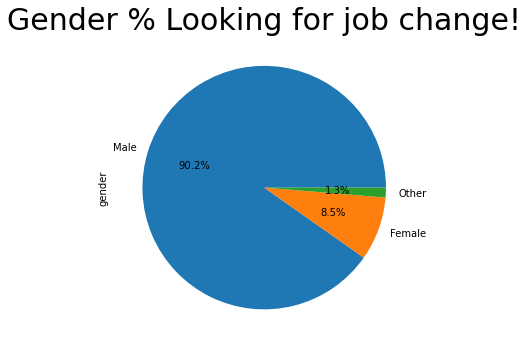

In [10]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Gender % Looking for job change!',fontsize = 30)
train['gender'].value_counts().plot.pie(autopct="%1.1f%%")

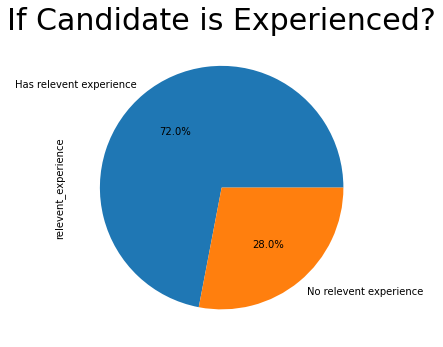

In [11]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('If Candidate is Experienced?',fontsize = 30)
train['relevent_experience'].value_counts().plot.pie(autopct="%1.1f%%")

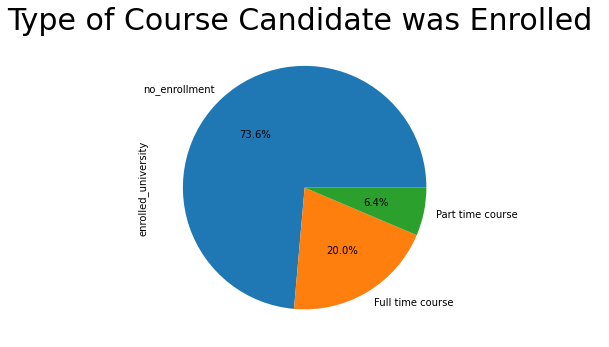

In [12]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Type of Course Candidate was Enrolled ',fontsize = 30)
train['enrolled_university'].value_counts().plot.pie(autopct="%1.1f%%")

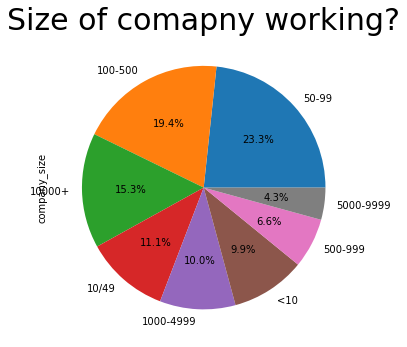

In [13]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Size of comapny working?',fontsize = 30)
train['company_size'].value_counts().plot.pie(autopct="%1.1f%%")

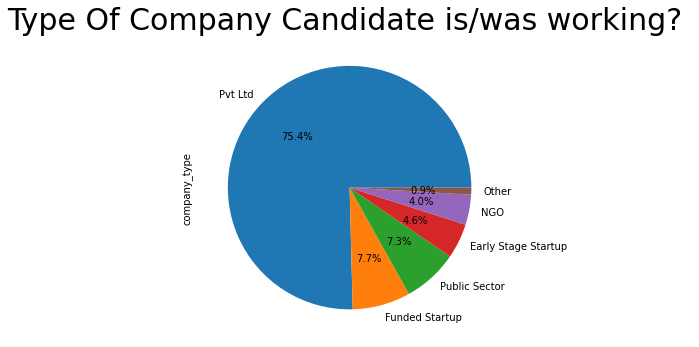

In [14]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Type Of Company Candidate is/was working? ',fontsize = 30)
train['company_type'].value_counts().plot.pie(autopct="%1.1f%%")

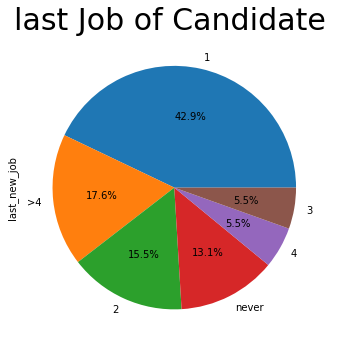

In [15]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('last Job of Candidate ',fontsize = 30)
train['last_new_job'].value_counts().plot.pie(autopct="%1.1f%%")

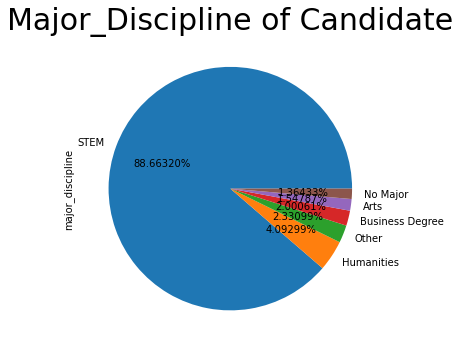

In [16]:
plt.figure(figsize=(30,15))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Major_Discipline of Candidate',fontsize = 30)
train['major_discipline'].value_counts().plot.pie(autopct="%1.5f%%")

In [17]:
train['training_hours'].value_counts()

28     329
12     292
18     291
22     282
50     279
      ... 
266      6
272      5
234      5
286      5
238      4
Name: training_hours, Length: 241, dtype: int64

In [18]:
train['target'].value_counts()


0.0    14381
1.0     4777
Name: target, dtype: int64

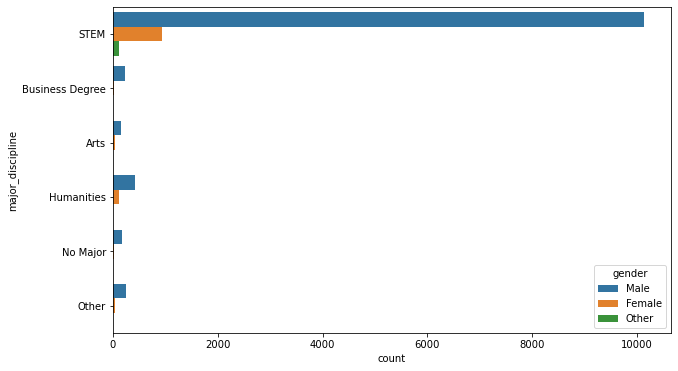

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(y="major_discipline",hue ='gender',data=train)

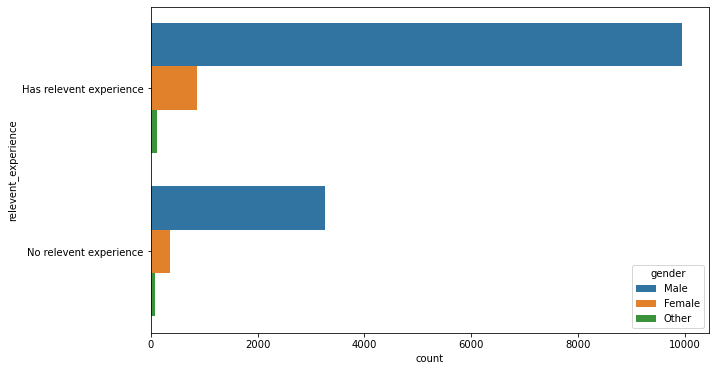

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(y="relevent_experience",hue ='gender',data=train)

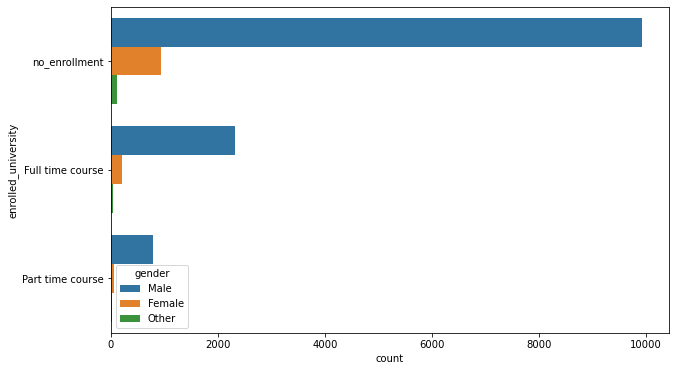

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(y="enrolled_university",hue ='gender',data=train)

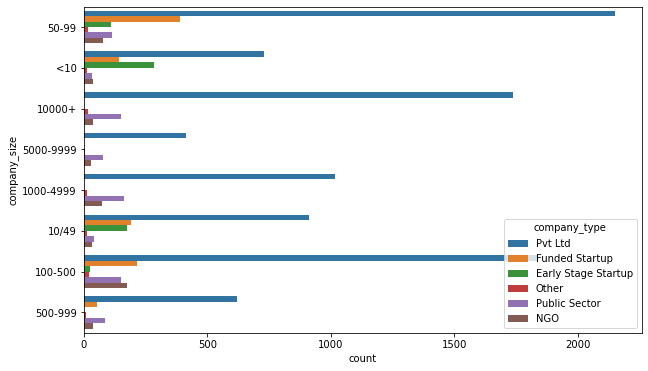

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(y="company_size",hue ='company_type',data=train)

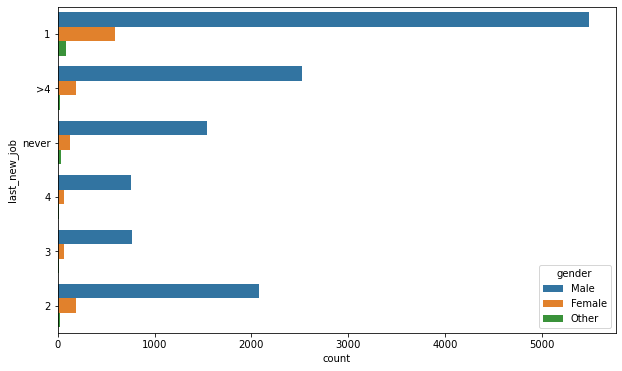

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(y="last_new_job",hue ='gender',data=train)

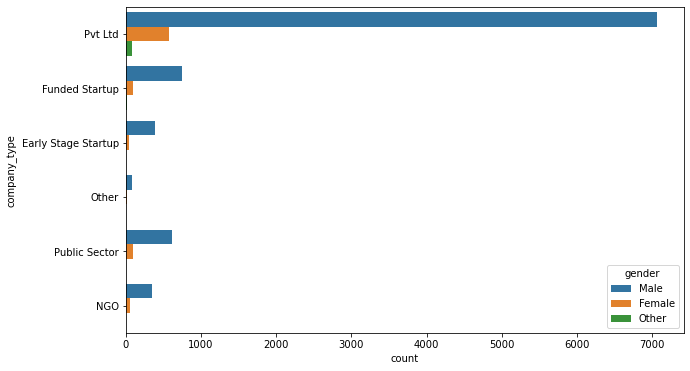

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(y="company_type",hue ='gender',data=train)

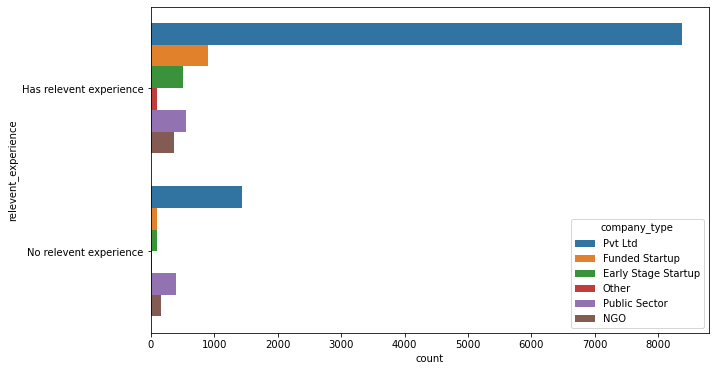

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(y="relevent_experience",hue ='company_type',data=train)

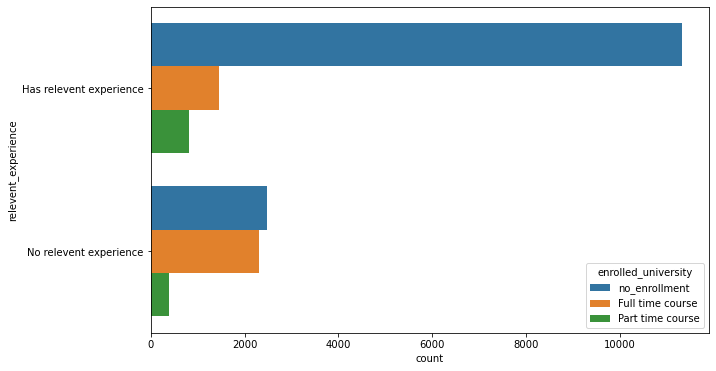

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(y="relevent_experience",hue ='enrolled_university',data=train)

In [27]:
display(train[['city','city_development_index','relevent_experience','gender','education_level','major_discipline','experience','company_size','company_type','target']].groupby(['gender','education_level','experience','company_size']).agg(["max",'mean',"min"]).style.background_gradient(cmap="Blues"))

## city_development_index
Continous Variable

In [28]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

cd = train['city_development_index'].value_counts().reset_index()
cd.columns = [
    'city_development_index', 
    'count'
]
cd['city_development_index'] = cd['city_development_index'].astype(str) + '-'
cd = cd.sort_values(['count']).tail(50)

fig = px.bar(
    cd, 
    x='count', 
    y='city_development_index', 
    orientation='h', 
    title='Count: City development index', 
    width=1000,
    height=900 
)

fig.show()


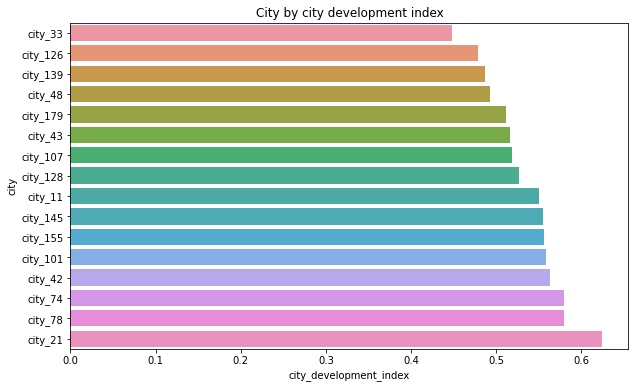

In [29]:
cdi = train.sort_values(by='city_development_index', ascending=True)[:2000]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=cdi.city, x=cdi.city_development_index)
plt.xticks()
plt.xlabel('city_development_index')
plt.ylabel('city')
plt.title('City by city development index')
plt.show()

## Distplot : Distribution plot
Depicts the variation in the data distribution for city development index

Text(0.5, 1.0, 'Distributional of city_development_index')

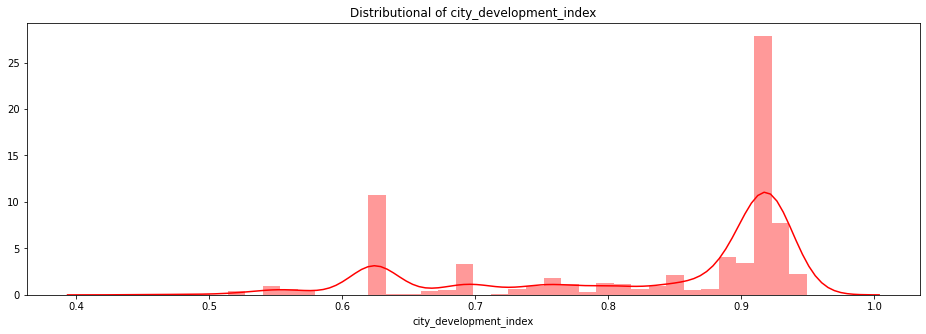

In [30]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(train["city_development_index"], color="red",ax = axes)
plt.title("Distributional of city_development_index")

## Preparation of data for Modelling

In [31]:
def gender_to_numeric(x):
    if x=='Female': return 2
    if x=='Male':   return 1
    if x=='Other':   return 0
    
def rel_experience(x):
    if x=='Has relevent experience': return 1
    if x=='No relevent experience':   return 0
    
def enrollment(x):
    if x=='no_enrollment'   : return 0
    if x=='Full time course':   return 1 
    if x=='Part time course':   return 2 
    
def edu_level(x):
    if x=='Graduate'       :   return 0
    if x=='Masters'        :   return 1 
    if x=='High School'    :   return 2 
    if x=='Phd'            :   return 3 
    if x=='Primary School' :   return 4 
    
def major(x):
    if x=='STEM'                   :   return 0
    if x=='Business Degree'        :   return 1 
    if x=='Arts'                   :   return 2 
    if x=='Humanities'             :   return 3 
    if x=='No Major'               :   return 4 
    if x=='Other'                  :   return 5 
    
def experience(x):
    if x=='<1'      :   return 0
    if x=='1'       :   return 1 
    if x=='2'       :   return 2 
    if x=='3'       :   return 3 
    if x=='4'       :   return 4 
    if x=='5'       :   return 5
    if x=='6'       :   return 6
    if x=='7'       :   return 7
    if x=='8'       :   return 8 
    if x=='9'       :   return 9 
    if x=='10'      :   return 10 
    if x=='11'      :   return 11
    if x=='12'      :   return 12
    if x=='13'      :   return 13 
    if x=='14'      :   return 14 
    if x=='15'      :   return 15 
    if x=='16'      :   return 16
    if x=='17'      :   return 17
    if x=='18'      :   return 18
    if x=='19'      :   return 19 
    if x=='20'      :   return 20 
    if x=='>20'     :   return 21 
    
def company_t(x):
    if x=='Pvt Ltd'               :   return 0
    if x=='Funded Startup'        :   return 1 
    if x=='Early Stage Startup'   :   return 2 
    if x=='Other'                 :   return 3 
    if x=='Public Sector'         :   return 4 
    if x=='NGO'                   :   return 5 
    
def company_s(x):
    if x=='<10'          :   return 0
    if x=='10/49'        :   return 1 
    if x=='100-500'      :   return 2 
    if x=='1000-4999'    :   return 3 
    if x=='10000+'       :   return 4 
    if x=='50-99'        :   return 5 
    if x=='500-999'      :   return 6 
    if x=='5000-9999'    :   return 7
    
def last_job(x):
    if x=='never'        :   return 0
    if x=='1'            :   return 1 
    if x=='2'            :   return 2 
    if x=='3'            :   return 3 
    if x=='4'            :   return 4 
    if x=='>4'           :   return 5 
    
def city(x):
    if x=='city_103'         : return  0
    if x=='city_40'          : return  1
    if x=='city_21'          : return  2
    if x=='city_115'         : return  3
    if x=='city_162'         : return  4
    if x=='city_176'         : return  5
    if x=='city_160'         : return  6
    if x=='city_46'          : return  7
    if x=='city_61'          : return  8
    if x=='city_114'         : return  9
    if x=='city_13'          : return  10
    if x=='city_159'         : return  11
    if x=='city_102'         : return  12
    if x=='city_67'          : return  13
    if x=='city_100'         : return  14
    if x=='city_16'          : return  15
    if x=='city_71'          : return  16
    if x=='city_104'         : return  17
    if x=='city_64'          : return  18
    if x=='city_101'         : return  19
    if x=='city_83'          : return  20
    if x=='city_105'         : return  21
    if x=='city_73'          : return  22
    if x=='city_75'          : return  23
    if x=='city_41'          : return  24
    if x=='city_11'          : return  25
    if x=='city_93'          : return  26
    if x=='city_90'          : return  27
    if x=='city_36'          : return  28
    if x=='city_20'          : return  29
    if x=='city_57'          : return  30
    if x=='city_152'         : return  31
    if x=='city_19'          : return  32
    if x=='city_65'          : return  33
    if x=='city_74'          : return  34
    if x=='city_173'         : return  35
    if x=='city_136'         : return  36
    if x=='city_98'          : return  37
    if x=='city_97'          : return  38
    if x=='city_50'          : return  39
    if x=='city_138'         : return  40
    if x=='city_82'          : return  41
    if x=='city_157'         : return  42
    if x=='city_89'          : return  43
    if x=='city_150'         : return  44
    if x=='city_70'          : return  45
    if x=='city_175'         : return  46
    if x=='city_94'          : return  47
    if x=='city_28'          : return  48
    if x=='city_59'          : return  49
    if x=='city_165'         : return  50
    if x=='city_145'         : return  51
    if x=='city_142'         : return  52
    if x=='city_26'          : return  53
    if x=='city_12'          : return  54
    if x=='city_37'          : return  55
    if x=='city_43'          : return  56
    if x=='city_116'         : return  57
    if x=='city_23'          : return  58
    if x=='city_99'          : return  59
    if x=='city_149'         : return  60
    if x=='city_10'          : return  61
    if x=='city_45'          : return  62
    if x=='city_80'          : return  63
    if x=='city_128'         : return  64
    if x=='city_158'         : return  65
    if x=='city_123'         : return  66
    if x=='city_7'           : return  67
    if x=='city_72'          : return  68
    if x=='city_106'         : return  69
    if x=='city_143'         : return  70
    if x=='city_78'          : return  71
    if x=='city_109'         : return  72
    if x=='city_24'          : return  73
    if x=='city_134'         : return  74
    if x=='city_48'          : return  75
    if x=='city_144'         : return  76
    if x=='city_91'          : return  77
    if x=='city_146'         : return  78
    if x=='city_133'         : return  79
    if x=='city_126'         : return  80
    if x=='city_118'         : return  81
    if x=='city_9'           : return  82
    if x=='city_167'         : return  83
    if x=='city_27'          : return  84
    if x=='city_84'          : return  85
    if x=='city_54'          : return  86
    if x=='city_39'          : return  87
    if x=='city_79'          : return  88
    if x=='city_76'          : return  89
    if x=='city_77'          : return  90
    if x=='city_81'          : return  91
    if x=='city_131'         : return  92
    if x=='city_44'          : return  93
    if x=='city_117'         : return  94
    if x=='city_155'         : return  95
    if x=='city_33'          : return  96
    if x=='city_141'         : return  97
    if x=='city_127'         : return  98
    if x=='city_62'          : return  99
    if x=='city_53'          : return  100
    if x=='city_25'          : return  101
    if x=='city_2'           : return  102
    if x=='city_69'          : return  103
    if x=='city_120'         : return  104
    if x=='city_111'         : return  105
    if x=='city_30'          : return  106
    if x=='city_1'           : return  107
    if x=='city_140'         : return  108
    if x=='city_179'         : return  109
    if x=='city_55'          : return  110
    if x=='city_14'          : return  111
    if x=='city_42'          : return  112
    if x=='city_107'         : return  113
    if x=='city_18'          : return  114
    if x=='city_139'         : return  115
    if x=='city_180'         : return  116
    if x=='city_166'         : return  117
    if x=='city_121'         : return  118
    if x=='city_129'         : return  119
    if x=='city_8'           : return  120
    if x=='city_31'          : return  121
    if x=='city_171'         : return  122

In [32]:
train['gender'] = train['gender'].apply(gender_to_numeric)
train['relevent_experience'] = train['relevent_experience'].apply(rel_experience)
train['enrolled_university'] = train['enrolled_university'].apply(enrollment)
train['education_level'] = train['education_level'].apply(edu_level)
train['major_discipline'] = train['major_discipline'].apply(major)
train['experience'] = train['experience'].apply(experience)
train['company_type'] = train['company_type'].apply(company_t)
train['company_size'] = train['company_size'].apply(company_s)
train['last_new_job'] = train['last_new_job'].apply(last_job)
train['city'] = train['city'].apply(city)

train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0,0.920,1.0,1,0.0,0.0,0.0,21.0,NaN,NaN,1.0,36,1.0
1,29725,1,0.776,1.0,0,0.0,0.0,0.0,15.0,5.0,0.0,5.0,47,0.0
2,11561,2,0.624,NaN,0,1.0,0.0,0.0,5.0,NaN,NaN,0.0,83,0.0
3,33241,3,0.789,NaN,0,NaN,0.0,1.0,0.0,NaN,0.0,0.0,52,1.0
4,666,4,0.767,1.0,1,0.0,1.0,0.0,21.0,5.0,1.0,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,35,0.878,1.0,0,0.0,0.0,3.0,14.0,NaN,NaN,1.0,42,1.0
19154,31398,0,0.920,1.0,1,0.0,0.0,0.0,14.0,NaN,NaN,4.0,52,1.0
19155,24576,0,0.920,1.0,1,0.0,0.0,0.0,21.0,5.0,0.0,4.0,44,0.0
19156,5756,33,0.802,1.0,1,0.0,2.0,NaN,0.0,6.0,0.0,2.0,97,0.0


### Train : Replace nan values with average of columns

In [33]:
train['gender'] = train['gender'].fillna((train['gender'].mean()))
train['enrolled_university'] = train['enrolled_university'].fillna((train['enrolled_university'].mean()))
train['major_discipline'] = train['major_discipline'].fillna((train['major_discipline'].mean()))
train['company_size'] = train['company_size'].fillna((train['company_size'].mean()))
train['company_type'] = train['company_type'].fillna((train['company_type'].mean()))
train['company_type'] = train['company_type'].fillna((train['company_type'].mean()))

train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,3.27466,0.690966,1.0,36,1.0
1,29725,1,0.776,1.000000,0,0.000000,0.0,0.000000,15.0,5.00000,0.000000,5.0,47,0.0
2,11561,2,0.624,1.071468,0,1.000000,0.0,0.000000,5.0,3.27466,0.690966,0.0,83,0.0
3,33241,3,0.789,1.071468,0,0.327775,0.0,1.000000,0.0,3.27466,0.000000,0.0,52,1.0
4,666,4,0.767,1.000000,1,0.000000,1.0,0.000000,21.0,5.00000,1.000000,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,35,0.878,1.000000,0,0.000000,0.0,3.000000,14.0,3.27466,0.690966,1.0,42,1.0
19154,31398,0,0.920,1.000000,1,0.000000,0.0,0.000000,14.0,3.27466,0.690966,4.0,52,1.0
19155,24576,0,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,5.00000,0.000000,4.0,44,0.0
19156,5756,33,0.802,1.000000,1,0.000000,2.0,0.344876,0.0,6.00000,0.000000,2.0,97,0.0


In [34]:
test['gender'] = test['gender'].apply(gender_to_numeric)
test['relevent_experience'] = test['relevent_experience'].apply(rel_experience)
test['enrolled_university'] = test['enrolled_university'].apply(enrollment)
test['education_level'] = test['education_level'].apply(edu_level)
test['major_discipline'] = test['major_discipline'].apply(major)
test['experience'] = test['experience'].apply(experience)
test['company_type'] = test['company_type'].apply(company_t)
test['company_size'] = test['company_size'].apply(company_s)
test['last_new_job'] = test['last_new_job'].apply(last_job)
test['city'] = test['city'].apply(city)

### Test : Replace nan values with average of columns

In [35]:
test['gender'] = test['gender'].fillna((test['gender'].mean()))
test['enrolled_university'] = test['enrolled_university'].fillna((test['enrolled_university'].mean()))
test['major_discipline'] = test['major_discipline'].fillna((test['major_discipline'].mean()))
test['company_size'] = test['company_size'].fillna((test['company_size'].mean()))
test['company_type'] = test['company_type'].fillna((test['company_type'].mean()))
test['company_type'] = test['company_type'].fillna((test['company_type'].mean()))

test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,24,0.827,1.0,1,1.0,0.0,0.000000,9.0,0.000000,0.692977,1.0,21
1,9858,0,0.920,2.0,1,0.0,0.0,0.000000,5.0,3.184472,0.000000,1.0,98
2,31806,2,0.624,1.0,0,0.0,2.0,0.329664,0.0,3.184472,0.000000,0.0,15
3,27385,10,0.827,1.0,1,0.0,1.0,0.000000,11.0,1.000000,0.000000,1.0,39
4,27724,0,0.920,1.0,1,0.0,0.0,0.000000,21.0,4.000000,0.000000,5.0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,0,0.920,1.0,0,0.0,0.0,3.000000,16.0,3.184472,4.000000,4.0,15
2125,195,36,0.897,1.0,1,0.0,1.0,0.000000,18.0,3.184472,0.692977,2.0,30
2126,31762,14,0.887,1.0,0,0.0,4.0,0.329664,3.0,3.184472,0.000000,0.0,18
2127,7873,12,0.804,1.0,1,1.0,2.0,0.329664,7.0,2.000000,4.000000,1.0,84


## Select feature column names and target variable we are going to use for training

In [36]:


features =["enrollee_id","city","city_development_index","gender","relevent_experience","enrolled_university","education_level","major_discipline","experience","company_size","company_type","last_new_job","training_hours"]
target = 'target'

## This is input which our classifier will use as an input.

In [37]:
train[features].head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,0,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,3.27466,0.690966,1.0,36
1,29725,1,0.776,1.000000,0,0.000000,0.0,0.000000,15.0,5.00000,0.000000,5.0,47
2,11561,2,0.624,1.071468,0,1.000000,0.0,0.000000,5.0,3.27466,0.690966,0.0,83
3,33241,3,0.789,1.071468,0,0.327775,0.0,1.000000,0.0,3.27466,0.000000,0.0,52
4,666,4,0.767,1.000000,1,0.000000,1.0,0.000000,21.0,5.00000,1.000000,4.0,8
5,21651,5,0.764,1.071468,1,2.000000,0.0,0.000000,11.0,3.27466,0.690966,1.0,24
6,28806,6,0.920,1.000000,1,0.000000,2.0,0.344876,5.0,5.00000,1.000000,1.0,24
7,402,7,0.762,1.000000,1,0.000000,0.0,0.000000,13.0,0.00000,0.000000,5.0,18
8,27107,0,0.920,1.000000,1,0.000000,0.0,0.000000,7.0,5.00000,0.000000,1.0,46
9,699,0,0.920,1.071468,1,0.000000,0.0,0.000000,17.0,4.00000,0.000000,5.0,123


In [38]:
#Display first 10 target variables
train[target].head(100).values

array([1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.])

## XGBoost:eXtreme Gradient Boosting.
Is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) ... A wide range of applications: Can be used to solve regression, classification, ranking, and user-defined prediction problems.

In [39]:
from xgboost import XGBRegressor
from xgboost import plot_importance
import shap

In [40]:
from sklearn.model_selection import train_test_split
X = train.drop(['target'],axis=1)
Y = train['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=9)

In [41]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(16284, 13)
(16284,)
(2874, 13)
(2874,)


In [42]:
model = XGBRegressor(max_depth=8,n_estimators=1000, min_child_weight=300,subsample=0.8,seed=42)

model.fit(X_train,Y_train,eval_metric="rmse",eval_set=[(X_train, Y_train), (X_test, Y_test)],verbose=True)

[0]	validation_0-rmse:0.44221	validation_1-rmse:0.44389
[1]	validation_0-rmse:0.40702	validation_1-rmse:0.41077
[2]	validation_0-rmse:0.38836	validation_1-rmse:0.39365
[3]	validation_0-rmse:0.37858	validation_1-rmse:0.38464
[4]	validation_0-rmse:0.37343	validation_1-rmse:0.38055
[5]	validation_0-rmse:0.37039	validation_1-rmse:0.37910
[6]	validation_0-rmse:0.36828	validation_1-rmse:0.37757
[7]	validation_0-rmse:0.36711	validation_1-rmse:0.37730
[8]	validation_0-rmse:0.36634	validation_1-rmse:0.37714
[9]	validation_0-rmse:0.36564	validation_1-rmse:0.37723
[10]	validation_0-rmse:0.36496	validation_1-rmse:0.37743
[11]	validation_0-rmse:0.36433	validation_1-rmse:0.37759
[12]	validation_0-rmse:0.36407	validation_1-rmse:0.37763
[13]	validation_0-rmse:0.36359	validation_1-rmse:0.37794
[14]	validation_0-rmse:0.36299	validation_1-rmse:0.37830
[15]	validation_0-rmse:0.36261	validation_1-rmse:0.37842
[16]	validation_0-rmse:0.36218	validation_1-rmse:0.37853
[17]	validation_0-rmse:0.36189	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=8,
             min_child_weight=300, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=0.8, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [43]:
# We predict target values (Split 15% from training data)
Y_predict = model.predict(X_test)
Y_predict

array([-0.1690917 ,  0.14217755,  0.44469765, ...,  0.065743  ,
        0.60550517,  0.28108382], dtype=float32)

In [44]:
#Test (Split 15% from training data)
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_predict)
metrics.auc(fpr, tpr)


0.7615572293678995

## Make predictions using the features from the test data set


In [45]:
predictions = model.predict(test[features])

predictions

array([-0.04201227, -0.05064636,  0.29385078, ..., -0.3119427 ,
       -0.1587016 ,  0.03359118], dtype=float32)

In [46]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(train[target],  model.predict(train[features]))
metrics.auc(fpr, tpr)

0.958228981127947

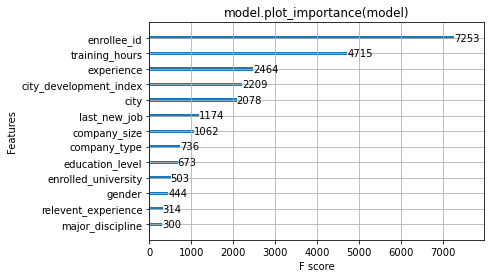

In [47]:
import xgboost
import matplotlib.pylab as plt
xgboost.plot_importance(model)
plt.title("model.plot_importance(model)")
plt.show()

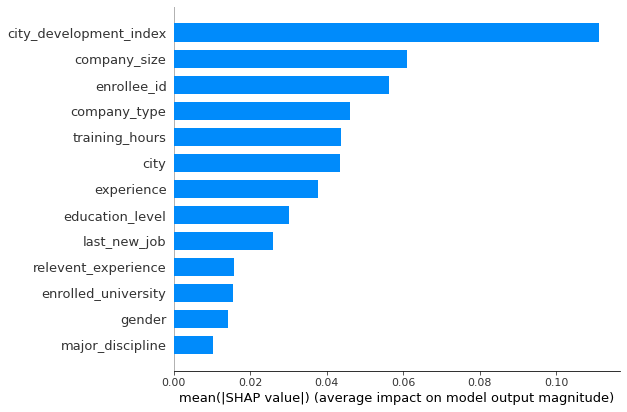

In [48]:
shap_values  = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

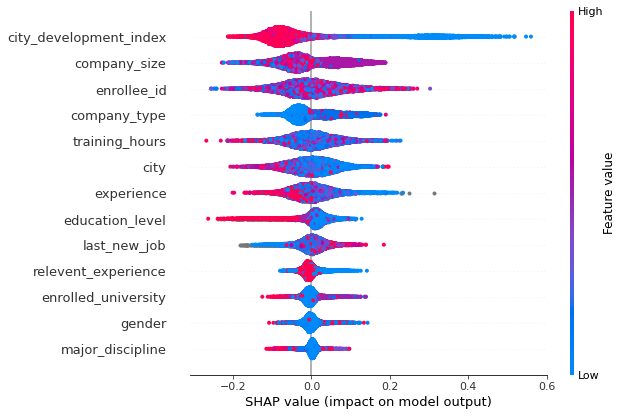

In [49]:
shap_values  = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [50]:
#Create a  DataFrame
submission = pd.DataFrame({'enrollee_id':test['enrollee_id'],'target':predictions})
                        

#Visualize the first 10 rows
submission.head(10)

,enrollee_id,target
0,32403,-0.042012
1,9858,-0.050646
2,31806,0.293851
3,27385,0.266521
4,27724,0.044413
5,217,0.235024
6,21465,1.044881
7,27302,1.017449
8,12994,0.446501
9,16287,0.352145


In [51]:
##% Submit Predictions 
submission.to_csv('submission.csv',index=False)

In [52]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'submission.csv'

submission.to_csv(filename,index=False)


## Please Upvote if you like my work.!